In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm

In [2]:
# Time setup
tfinal = 1e-8       # Final time of simulation
ntot = 10000         # total number of time steps
# Material properties
A_ex = 1.6e-11      # exchange constant
Ku = 0.5e6          # anisotropy constant
u_easy = (0, 0, 1)  # easy axis
damping = .00001    # damping constant (alpha)
# Alternating source properties
freq = 1e9         # source frequency (Hz)
H_app = (0, 0, 3000) # applied field (A/m)
source_type = 'sin' # waveform of source
# Other parameters
T = 273             # temperature

In [3]:
region = df.Region(p1=(-10e-9, -10e-9, -10e-9), p2=(10e-9, 10e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

In [4]:
mesh.k3d()

Output()

Output()

In [5]:
system = mm.System(name='cylinder')

In [6]:
Ms = 1.1e6

def Ms_fun(pos):
    """Function to set magnitude of magnetisation: zero outside cylindric shape,
    Ms inside cylinder.

    Cylinder radius is 50nm.

    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return Ms
    else:
        return 0

In [7]:
def m_init(pos):
    """Function to set initial magnetisation direction:
    -z inside cylinder (r=10nm),
    +z outside cylinder.
    y-component to break symmetry.

    """
    x, y, z = pos
    if z < 0:
        return (0, 1, 1)
    else:
        return (0, -1, -1)


# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms_fun)

In [8]:
system.m.norm.k3d.nonzero()

Output()

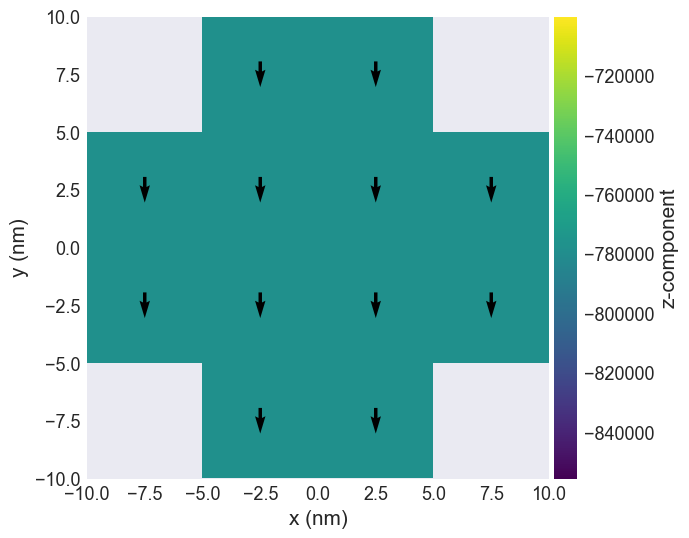

In [9]:
system.m.plane('z').mpl()

In [10]:
system.energy = (mm.Exchange(A=A_ex)
               + mm.UniaxialAnisotropy(K=Ku, u=u_easy)
               + mm.Demag()
               + mm.Zeeman(H=H_app, func=source_type, f=freq, t0=0))
system.energy

Exchange(A=1.6e-11) + UniaxialAnisotropy(K=500000.0, u=(0, 0, 1)) + Demag() + Zeeman(H=(0, 0, 3000), f=1000000000.0, t0=0, func='sin')

In [11]:
td = oc.TimeDriver()
td.drive(system, t=tfinal, n=int(ntot))

Running OOMMF (ExeOOMMFRunner)[2023/07/12 10:03]... (76.0 s)


In [12]:
system.table.data

,E,E_calc_count,max_dm/dt,dE/dt,delta_E,E_exchange,max_spin_ang_exchange,stage_max_spin_ang_exchange,run_max_spin_ang_exchange,E_uniaxialanisotropy,...,By_zeeman,Bz_zeeman,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,7.183512e-18,7.0,0.0,-3.017287e-28,0.0,3.840000e-18,180.0,180.0,180.0,1.500000e-18,...,0.0,2.368689e-02,1.0,1.0,0.0,0.0,0.0,0.0,1.000000e-12,1.000000e-12
1,7.183512e-18,14.0,0.0,2.000511e-28,0.0,3.840000e-18,180.0,180.0,180.0,1.500000e-18,...,0.0,4.737285e-02,3.0,1.0,1.0,0.0,0.0,0.0,1.000000e-12,2.000000e-12
2,7.183512e-18,21.0,0.0,1.061072e-29,0.0,3.840000e-18,180.0,180.0,180.0,1.500000e-18,...,0.0,7.105694e-02,5.0,1.0,2.0,0.0,0.0,0.0,1.000000e-12,3.000000e-12
3,7.183512e-18,28.0,0.0,8.587752e-29,0.0,3.840000e-18,180.0,180.0,180.0,1.500000e-18,...,0.0,9.473823e-02,7.0,1.0,3.0,0.0,0.0,0.0,1.000000e-12,4.000000e-12
4,7.183512e-18,35.0,0.0,-1.384835e-28,0.0,3.840000e-18,180.0,180.0,180.0,1.500000e-18,...,0.0,1.184158e-01,9.0,1.0,4.0,0.0,0.0,0.0,1.000000e-12,5.000000e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.183512e-18,69972.0,0.0,-1.070047e-27,0.0,3.840000e-18,180.0,180.0,180.0,1.500000e-18,...,0.0,-9.473823e-02,19991.0,1.0,9995.0,0.0,0.0,0.0,1.000000e-12,9.996000e-09
9996,7.183512e-18,69979.0,0.0,7.061095e-30,0.0,3.840000e-18,180.0,180.0,180.0,1.500000e-18,...,0.0,-7.105694e-02,19993.0,1.0,9996.0,0.0,0.0,0.0,1.000000e-12,9.997000e-09
9997,7.183512e-18,69986.0,0.0,9.812786e-28,0.0,3.840000e-18,180.0,180.0,180.0,1.500000e-18,...,0.0,-4.737285e-02,19995.0,1.0,9997.0,0.0,0.0,0.0,1.000000e-12,9.998000e-09
9998,7.183512e-18,69993.0,0.0,-1.086506e-27,0.0,3.840000e-18,180.0,180.0,180.0,1.500000e-18,...,0.0,-2.368689e-02,19997.0,1.0,9998.0,0.0,0.0,0.0,1.000000e-12,9.999000e-09


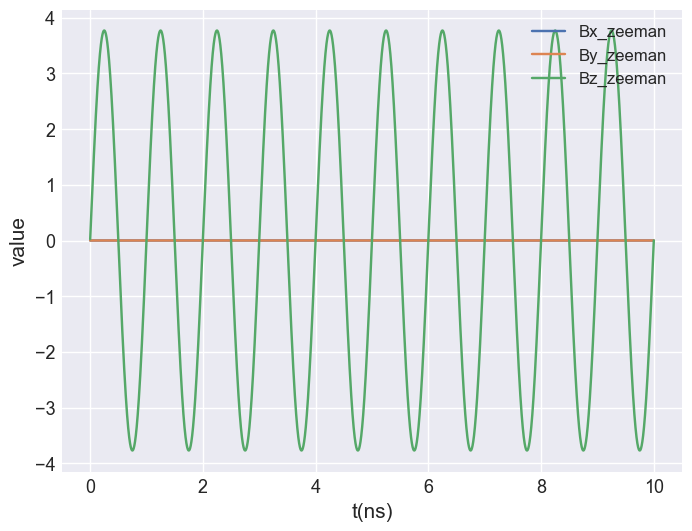

In [13]:
system.table.mpl(y=['Bx_zeeman', 'By_zeeman', 'Bz_zeeman'])

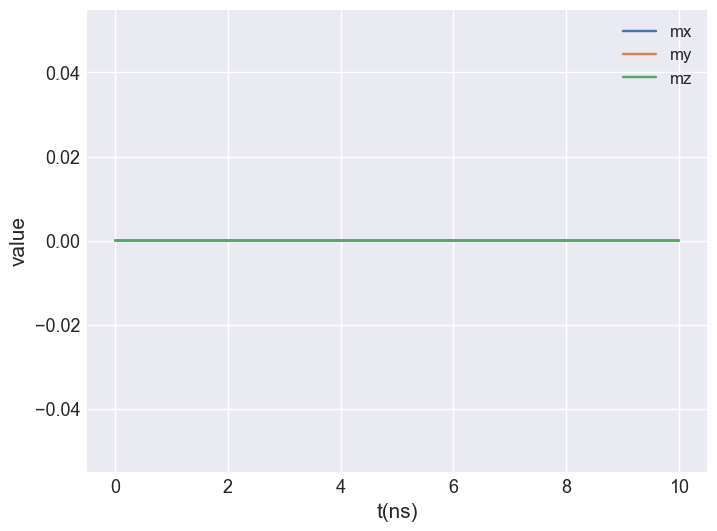

In [14]:
system.table.mpl(y=['mx', 'my', 'mz'])

In [15]:
mx = system.table.data['mx']
my = system.table.data['my']
mz = system.table.data['mz']

In [16]:
import numpy as np
B = np.array([1e6, 2e6, 3e6])
B = B/np.linalg.norm(B)
Bx = B[0]
By = B[1]
Bz = B[2]

In [17]:
L1 = -24
L2 = -48
ll = 3/2*L1*(mx**2*Bx**2+my**2*By**2+my**2*Bz**2-1/3)+3*L2*(mx*my*Bx*By+my*mz*By*Bz+mz*mx*Bz*Bx)

In [18]:
system.table.data['ll'] = ll

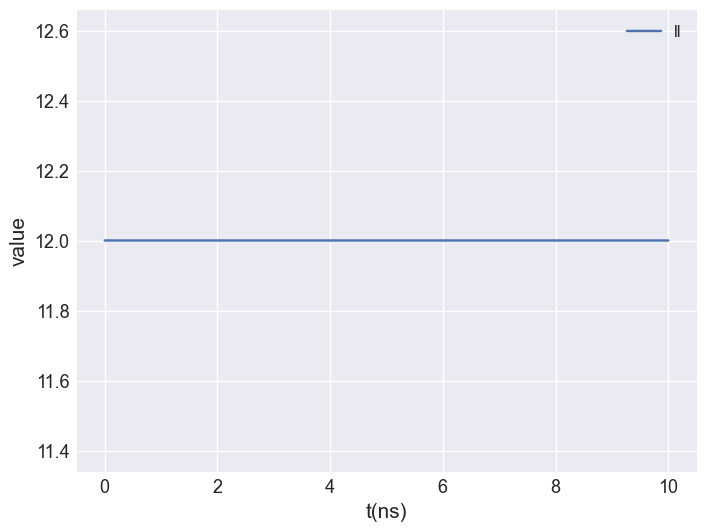

In [19]:
system.table.mpl(y=['ll'])

In [22]:
from numpy.fft import fft, ifft
x = np.array(system.table.data['ll'])
fft_ll = fft(x)
N = len(fft_ll)
n = np.arange(N)

n2 = int(ntot/2)
rng = int(n2-1)
amp_ll = np.abs(fft_ll[1:n2]/N)
fq = np.array(range(0,rng))*10

tt = np.max(system.table.data['t'])
freq2 = n/tt

(0.0, 0.1)

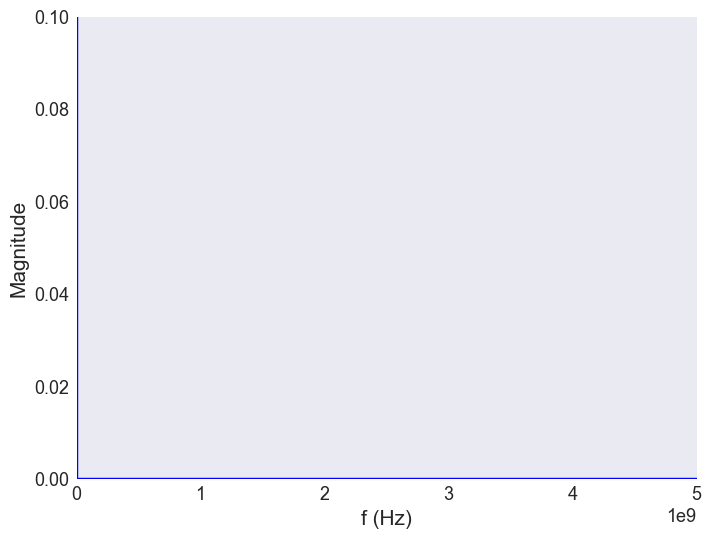

In [23]:
import matplotlib.pyplot as plt
plt.stem(freq2, np.abs(fft_ll)/N, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('f (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0,int(5*freq))
plt.ylim(0,.1)